In [ ]:
from torch.utils.data import DataLoader,Dataset
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import torchvision.models as models
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
train_data = datasets.MNIST(root='./data',train=True,download=True,transform=torchvision.transforms.ToTensor())
test_data = datasets.MNIST(root='./data',train=False,download=True,transform=torchvision.transforms.ToTensor())
train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_data,batch_size=64,shuffle=True)

In [ ]:
class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        self.model = torch.nn.Sequential(
              torch.nn.Linear(100,256),
              torch.nn.LeakyReLU(0.2),
              torch.nn.Linear(256,512),
              torch.nn.LeakyReLU(0.2),
              torch.nn.Linear(512,512),
              torch.nn.LeakyReLU(0.2),
              torch.nn.Linear(512,784),
              torch.nn.Tanh()
          )


    def forward(self,x):
        return self.model(x)

class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.model = torch.nn.Sequential(
              torch.nn.Linear(784,512),
              torch.nn.LeakyReLU(0.2),
              torch.nn.Linear(512, 512),
              torch.nn.LeakyReLU(0.2),
              torch.nn.Linear(512, 256),
              torch.nn.LeakyReLU(0.2),
              torch.nn.Linear(256, 1),
              torch.nn.Sigmoid()
          )

    def forward(self,x):
        return self.model(x)


In [ ]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)
gen_optim = torch.optim.Adam(generator.parameters(),lr=0.0002)
dis_optim = torch.optim.Adam(discriminator.parameters(),lr=0.0002)
loss = torch.nn.BCELoss()
epochs = 20

In [ ]:
for epoch in range(epochs):
    running_gen_loss = 0.0
    running_dis_loss = 0.0
    for (real_batch,_) in tqdm(train_loader):
        real_data = real_batch.view(-1,784).to(device)
        real_label = torch.ones(real_data.size(0),1).to(device)
        fake_label = torch.zeros(real_data.size(0),1).to(device)
        noise = torch.randn(real_data.size(0),100).to(device)
        fake_data = generator(noise)

        # train discrimator
        discriminator.zero_grad()
        real_predict = discriminator(real_data)
        real_loss = loss(real_predict,real_label)
        fake_predict = discriminator(fake_data.detach())
        fake_loss = loss(fake_predict,fake_label)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        dis_optim.step()


        generator.zero_grad()
        predict = discriminator(fake_data)
        g_loss = loss(predict,real_label)
        g_loss.backward()
        gen_optim.step()
        running_gen_loss += g_loss.item()
        running_dis_loss += d_loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {running_dis_loss}, Generator Loss: {running_gen_loss}")



100%|██████████| 938/938 [00:17<00:00, 54.47it/s]


Epoch 1/20, Discriminator Loss: 1136.2089152038097, Generator Loss: 1301.2550347596407


100%|██████████| 938/938 [00:12<00:00, 77.61it/s]


Epoch 2/20, Discriminator Loss: 778.415058478713, Generator Loss: 2179.1510405540466


100%|██████████| 938/938 [00:12<00:00, 77.14it/s]


Epoch 3/20, Discriminator Loss: 674.5124961286783, Generator Loss: 2211.2429488897324


100%|██████████| 938/938 [00:12<00:00, 77.31it/s]


Epoch 4/20, Discriminator Loss: 623.2351451963186, Generator Loss: 2205.9311698675156


100%|██████████| 938/938 [00:12<00:00, 72.70it/s]


Epoch 5/20, Discriminator Loss: 579.2634363025427, Generator Loss: 2388.2070422172546


100%|██████████| 938/938 [00:12<00:00, 74.67it/s]


Epoch 6/20, Discriminator Loss: 599.859623759985, Generator Loss: 2410.5178592205048


100%|██████████| 938/938 [00:12<00:00, 77.00it/s]


Epoch 7/20, Discriminator Loss: 509.9433482736349, Generator Loss: 2572.9548124074936


100%|██████████| 938/938 [00:12<00:00, 77.11it/s]


Epoch 8/20, Discriminator Loss: 444.66235277056694, Generator Loss: 2826.322656393051


100%|██████████| 938/938 [00:12<00:00, 76.94it/s]


Epoch 9/20, Discriminator Loss: 435.9041872024536, Generator Loss: 2783.4765635728836


100%|██████████| 938/938 [00:12<00:00, 76.86it/s]


Epoch 10/20, Discriminator Loss: 436.56405448168516, Generator Loss: 2821.886915206909


100%|██████████| 938/938 [00:12<00:00, 76.95it/s]


Epoch 11/20, Discriminator Loss: 397.7580281794071, Generator Loss: 2974.1960077285767


100%|██████████| 938/938 [00:12<00:00, 76.61it/s]


Epoch 12/20, Discriminator Loss: 384.1426925510168, Generator Loss: 3054.0684711933136


100%|██████████| 938/938 [00:12<00:00, 76.12it/s]


Epoch 13/20, Discriminator Loss: 338.57090888917446, Generator Loss: 3271.2139177322388


100%|██████████| 938/938 [00:12<00:00, 77.85it/s]


Epoch 14/20, Discriminator Loss: 308.7067012935877, Generator Loss: 3549.879760980606


100%|██████████| 938/938 [00:12<00:00, 77.73it/s]


Epoch 15/20, Discriminator Loss: 298.01711931079626, Generator Loss: 3559.0329706668854


100%|██████████| 938/938 [00:12<00:00, 76.02it/s]


Epoch 16/20, Discriminator Loss: 275.2141723036766, Generator Loss: 3699.5007679462433


100%|██████████| 938/938 [00:12<00:00, 73.77it/s]


Epoch 17/20, Discriminator Loss: 258.50346902012825, Generator Loss: 3945.3905396461487


100%|██████████| 938/938 [00:12<00:00, 75.84it/s]


Epoch 18/20, Discriminator Loss: 237.0785312280059, Generator Loss: 4001.3976740837097


100%|██████████| 938/938 [00:12<00:00, 76.08it/s]


Epoch 19/20, Discriminator Loss: 229.87095860019326, Generator Loss: 4147.09782910347


100%|██████████| 938/938 [00:12<00:00, 75.41it/s]

Epoch 20/20, Discriminator Loss: 204.53787329047918, Generator Loss: 4347.637500047684


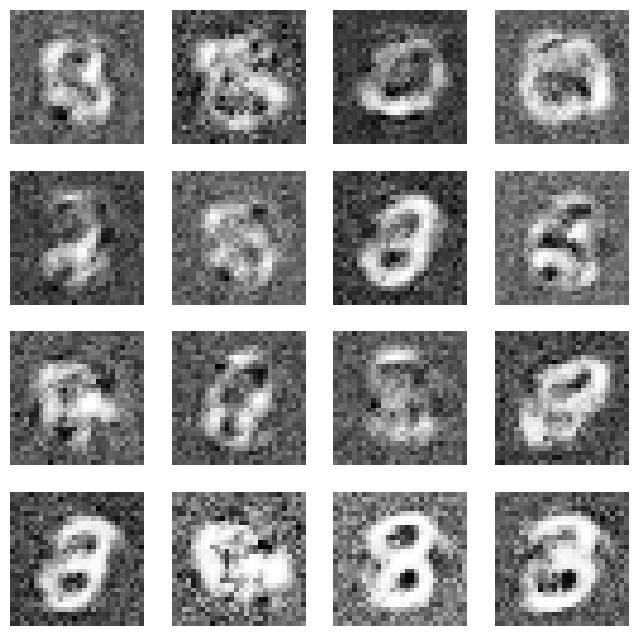

In [ ]:
generator.eval()
with torch.no_grad():
    z = torch.randn(16, 100).to(device)
    samples =generator(z).cpu().view(-1, 28, 28)


fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(samples[i], cmap="gray")
    ax.axis("off")
plt.show()


